**Predict Loan Eligibility for Mortgage Loan Companies**

# Problem Statement

Mortgage companies deal in all kinds of home loans. They have a presence across all urban, semi urban, and rural areas. Customers apply for home loans and after that, the company validates the customer eligibility for the mortgage. The Company wants to automate the loan eligibility process based on customer details provided while filling online application forms. These details include Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, past application and approval data are available. We are going to build a model to identify the customer segments that are eligible for the mortgage. This project can help the mortgage company to develop market strategies specifically targeting these customers. 

# What do you know?
As the scale of the credit business continues to expand, the requirements for the accuracy of risk management have gradually increased. The current mortgage application process still involves lots of bankers and advisors. And the process takes a long time. Customers need to fill in lots of information during the application, even though some of them are not necessary. We also want to pick out the most useful items for customers to fill out, to increase the efficiency of the mortgage application, as well as protecting the privacy info. Also, some unimportant features will become important at some time. For example, during the epidemic, the importance of income-related features will increase. We need to pay attention to these updated features.

# Solutions
One solution is to build machine learning models to predict the loan application based on available data. We don't have the target data in the test dataset, but we can submit the prediction result and check out the solution score.

# Break the projects steps chronologically (include timelines)
- 1.Data Loading
- 2.EDA
- 3.Data Preparation
- 4.Model Building
- 5.Validation
- 6.Feature Engineering
- 7.Results
- 8.Conclusion

In [41]:
# Loading packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

# 1.Data Loading

In [42]:
# Reading data
train = pd.read_csv("train_ctrUa4K.csv")
test = pd.read_csv("test_lAUu6dG.csv")
train_copy = train.copy()
test_copy = test.copy()

In [43]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

We have 12 columns and 1 target variable, Loan_Status, in the train dataset. 

In [44]:
test.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

We have similar features in the train dataset except the Loan_Status, will we will predit using the model built from the train dataset.

In [45]:
# print datatypes for each variables
train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [46]:
# The shape of the dataset
print("train dataset:",train.shape)
print("test dataset:",test.shape)

train dataset: (614, 13)
test dataset: (367, 12)


# 2.Exploratory data analysis

## 2.1 Univariable Analysis

Y    422
N    192
Name: Loan_Status, dtype: int64
Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64


<AxesSubplot:>

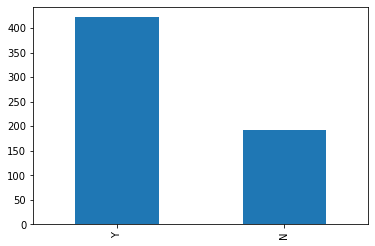

In [47]:
# Univariable analysis
# We use frequency table or bar plots to categorical features
# Look at frequency table, bar plot, and percentage distribution for the target variable
print(train["Loan_Status"].value_counts())
print(train["Loan_Status"].value_counts(normalize=True))
train["Loan_Status"].value_counts().plot.bar()

The loan of 422(around 69%) people out of 614 was approved.

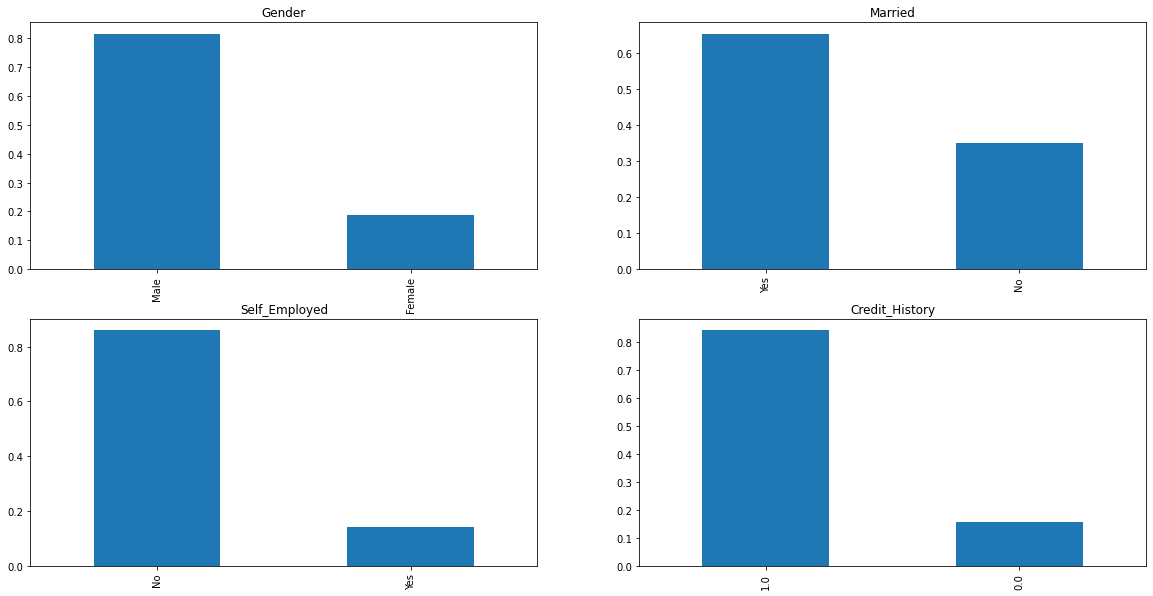

In [48]:
# Independent variable
plt.figure(1)
plt.subplot(221)
train['Gender'].value_counts(normalize=True).plot.bar(figsize=(20,10), title= 'Gender') 
plt.subplot(222)
train['Married'].value_counts(normalize=True).plot.bar(title= 'Married') 
plt.subplot(223)
train['Self_Employed'].value_counts(normalize=True).plot.bar(title= 'Self_Employed') 
plt.subplot(224)
train['Credit_History'].value_counts(normalize=True).plot.bar(title= 'Credit_History') 
plt.show()

80% applicants in the dataset are male.

Around 65% of the applicants in the dataset are married.

Around 15% applicants in the dataset are self employed.

Around 85% applicants have repaid their debts.

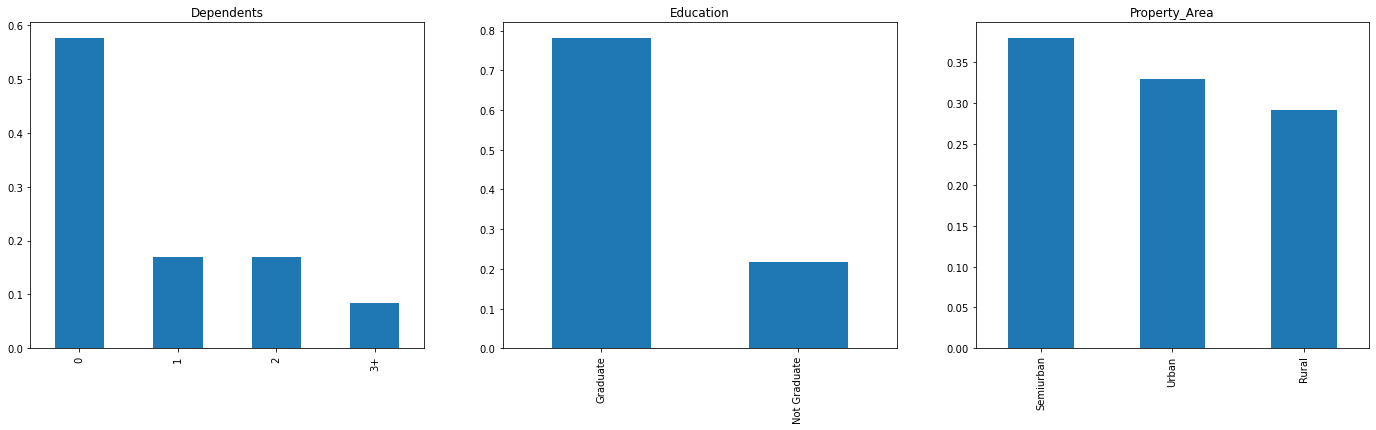

In [49]:
plt.figure(1)
plt.subplot(131)
train['Dependents'].value_counts(normalize=True).plot.bar(figsize=(24,6), title= 'Dependents') 
plt.subplot(132)
train['Education'].value_counts(normalize=True).plot.bar(title= 'Education') 
plt.subplot(133)
train['Property_Area'].value_counts(normalize=True).plot.bar(title= 'Property_Area') 
plt.show()

Most of the applicants don’t have any dependents.

Around 80% of the applicants are Graduate.

Most of the applicants are from Semiurban area.

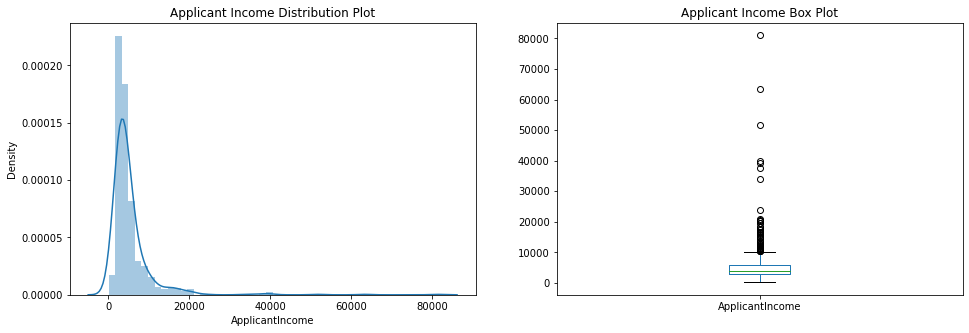

In [50]:
plt.figure(1)
plt.subplot(121)
sns.distplot(train['ApplicantIncome']) 
plt.title("Applicant Income Distribution Plot")
plt.subplot(122)
train['ApplicantIncome'].plot.box(figsize=(16,5),title= 'Applicant Income Box Plot') 
plt.show()

It can be inferred that most of the data in the distribution of applicant income is towards left which means it is not normally distributed. We will try to make it normal later.

The boxplot confirms the presence of a lot of outliers/extreme values. This can be attributed to the income disparity in the society. Part of this can be driven by the fact that we are looking at people with different education levels. Let us segregate them by Education:

Text(0.5, 0.98, '')

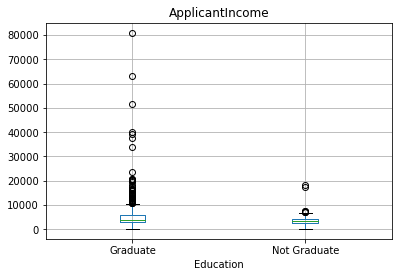

In [51]:
train.boxplot(column = "ApplicantIncome", by = "Education")
plt.suptitle("")

We can see that there are a higher number of graduates with very high incomes, which are appearing to be the outliers.

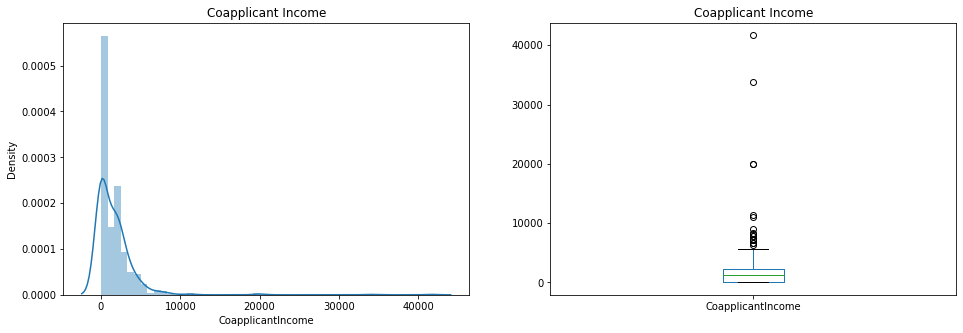

In [52]:
plt.figure(1)
plt.subplot(121)
sns.distplot(train['CoapplicantIncome'])
plt.title("Coapplicant Income")
plt.subplot(122)
train['CoapplicantIncome'].plot.box(figsize=(16,5),title="Coapplicant Income") 
plt.show()

We can see a similiar distribution as that of applicant income. Majority of applicants' income range from 0 to 5000. We can see a lot of outliers in the coapplicant income and it is not normally distributed.

<AxesSubplot:title={'center':'Loan Amount'}>

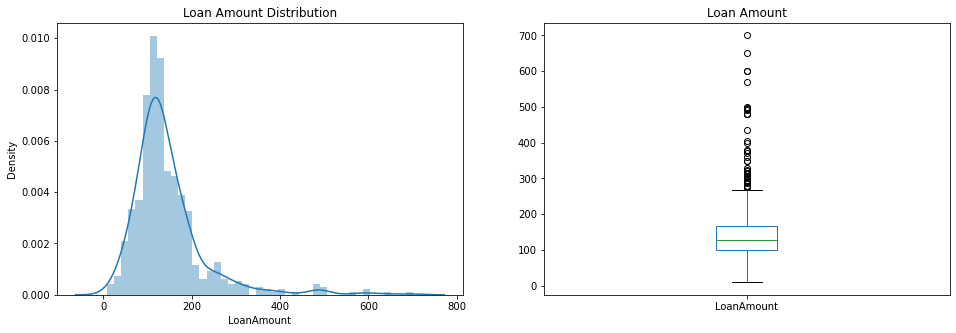

In [53]:
plt.figure(1)
plt.subplot(121)
sns.distplot(train['LoanAmount'])
plt.title("Loan Amount Distribution")
plt.subplot(122)
train["LoanAmount"].plot.box(figsize=(16,5),title="Loan Amount")

We can see a lot of outliers in the variable and the distribution fairly normal. 

## 2.2 Bivariable Analysis

<AxesSubplot:xlabel='Gender'>

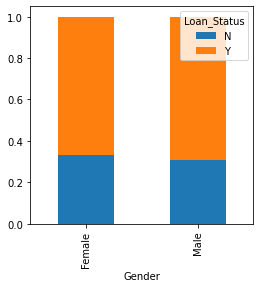

In [54]:
Gender=pd.crosstab(train['Gender'],train['Loan_Status']) 
Gender.div(Gender.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))

It can be referred that the proportion of male and female applicants is same for both approved and unapproved loans.

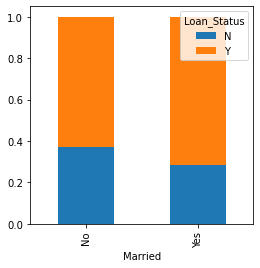

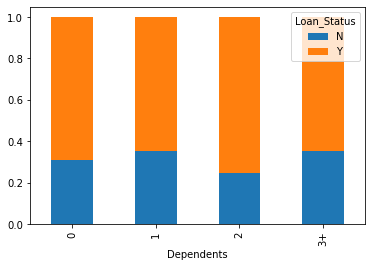

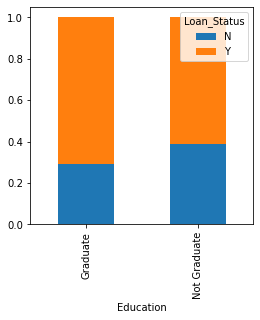

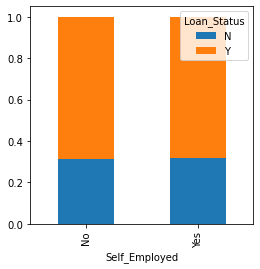

In [55]:
Married=pd.crosstab(train['Married'],train['Loan_Status'])
Dependents=pd.crosstab(train['Dependents'],train['Loan_Status'])
Education=pd.crosstab(train['Education'],train['Loan_Status'])
Self_Employed=pd.crosstab(train['Self_Employed'],train['Loan_Status']) 
Married.div(Married.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
plt.show() 
Dependents.div(Dependents.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.show() 
Education.div(Education.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
plt.show() 
Self_Employed.div(Self_Employed.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
plt.show()

Proportion of married applicants is higher for the approved loans. Distribution of appicants with 1 or 3+ dependents is similiar across both the categories of Loan_Status.

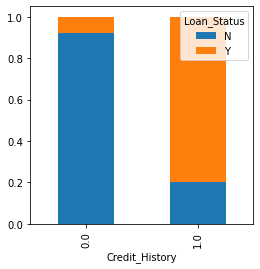

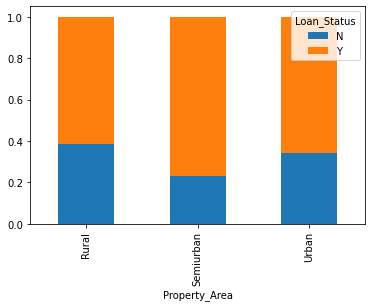

In [56]:
Credit_History=pd.crosstab(train['Credit_History'],train['Loan_Status'])
Property_Area=pd.crosstab(train['Property_Area'],train['Loan_Status']) 
Credit_History.div(Credit_History.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
plt.show() 
Property_Area.div(Property_Area.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.show()

It seems that people with credit history as 1 are more likely to get their loans approved. Proportion of loans getting approved in semiurban area is higher as compared to that in rural or urban areas.

Text(0, 0.5, 'Applicant Income Mean')

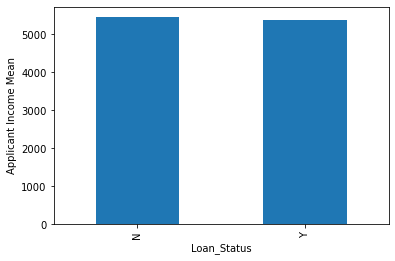

In [57]:
train.groupby('Loan_Status')['ApplicantIncome'].mean().plot.bar()
plt.ylabel('Applicant Income Mean')

I don't see any changes in the mean income. I will make bins for the applicant income variable based on the values and analyze the corresponding loan status for each bin.

Text(0, 0.5, 'Percentage')

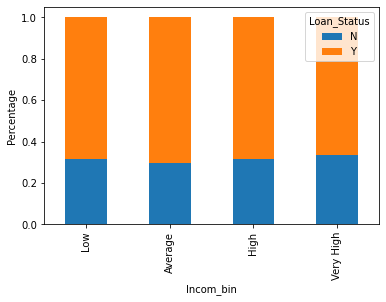

In [58]:
bins = [0,2500,4000,6000,81000]
group = ['Low','Average','High','Very High']
train['Incom_bin'] = pd.cut(train['ApplicantIncome'], bins, labels = group)
Incom_bin = pd.crosstab(train['Incom_bin'], train['Loan_Status'])
Incom_bin.div(Incom_bin.sum(1).astype(float),axis = 0).plot.bar(stacked = True)
plt.ylabel('Percentage')

It can be inferred that Applicant income does not affect the chances of loan approval.

Text(0, 0.5, 'Percentage')

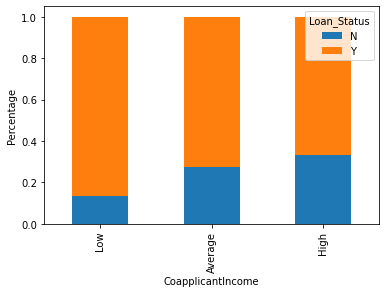

In [59]:
# Analyze the coapplicant income and loan amount variable in the same manner 
bins=[0,1000,3000,42000]
group=['Low','Average','High']
train['Coapplicant_Income_bin']=pd.cut(train['CoapplicantIncome'],bins,labels=group)
Coapplicant_Income_bin=pd.crosstab(train['Coapplicant_Income_bin'],train['Loan_Status'])
Coapplicant_Income_bin.div(Coapplicant_Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('CoapplicantIncome')
plt.ylabel('Percentage')

It shows that if coapplicant’s income is less the chances of loan approval are high. But this does not look right. The possible reason behind this may be that most of the applicants don’t have any coapplicant so the coapplicant income for such applicants is 0 and hence the loan approval is not dependent on it. So we can make a new variable in which we will combine the applicant’s and coapplicant’s income to visualize the combined effect of income on loan approval.

Text(0, 0.5, 'Percentage')

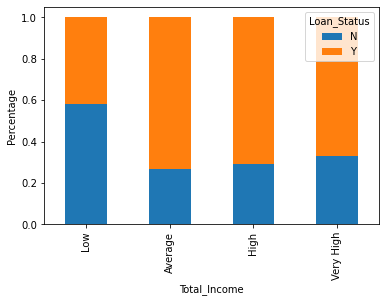

In [60]:
train['Total_Income'] = train['ApplicantIncome']+train['CoapplicantIncome']
bins = [0,2500,4000,6000,81000]
group = ['Low','Average','High','Very High']
train['Total_Income_bin'] = pd.cut(train['Total_Income'],bins,labels=group)
Totle_Income_bin = pd.crosstab(train['Total_Income_bin'],train['Loan_Status'])
Totle_Income_bin.div(Totle_Income_bin.sum(1).astype(float),axis=0).plot.bar(stacked=True)
plt.xlabel('Total_Income')
plt.ylabel('Percentage')

We can see that the proportion of loans getting approved for applicant having Total_Income is very less as compared to that of the applicants with Average, High, and Very High income.

<AxesSubplot:xlabel='LoanAmount_bin'>

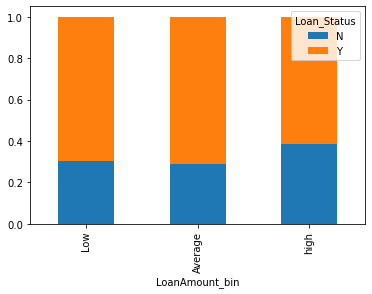

In [61]:
# Loan Amount Variable
bins = [0,100,200,700]
group = ['Low', 'Average','high']
train['LoanAmount_bin'] = pd.cut(train['LoanAmount'],bins,labels=group)
LoanAmount_bin = pd.crosstab(train['LoanAmount_bin'],train['Loan_Status'])
LoanAmount_bin.div(LoanAmount_bin.sum(1).astype(float),axis=0).plot.bar(stacked=True)

It can be seen that the proportion of approved loans is higher for Low and Average Loan Amount as compared to that of High Loan Amount which supports our hypothesis in which we considered that the chances of loan approval will be high when the loan amount is less.

Let’s drop the bins which we created for the exploration part. We will change the 3+ in dependents variable to 3 to make it a numerical variable.We will also convert the target variable’s categories into 0 and 1 so that we can find its correlation with numerical variables. One more reason to do so is few models like logistic regression takes only numeric values as input. We will replace N with 0 and Y with 1.

In [62]:
train = train.drop(['Incom_bin','Coapplicant_Income_bin','LoanAmount_bin','Total_Income_bin','Total_Income'],axis=1)

In [63]:
train['Dependents'].replace('3+', 3,inplace=True)
test['Dependents'].replace('3+', 3,inplace=True)
train['Loan_Status'].replace('N', 0,inplace=True)
train['Loan_Status'].replace('Y', 1,inplace=True)

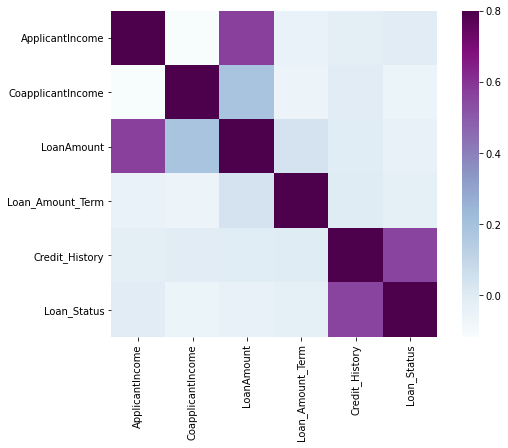

In [64]:
# Look at correlations between all numerical variables
# Use heatmap
matrix = train.corr()
f, ax = plt.subplots(figsize=(9,6))
sns.heatmap(matrix,vmax=0.8,square=True,cmap='BuPu');

We see that the most correlated variables are (ApplicantIncome - LoanAmount) and (Credit_History - Loan_Status). LoanAmount is also correlated with CoapplicantIncome.

# 3.Missing value and Outlier Treatment

Missing data and outliers can have adverse effect on the model performance.

## 3.1 Missing value imputation

In [65]:
# list out all missing values for all features
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

There are missing values in Gender, Married, Dependents, Self_Employed, LoanAmount, Loan_Amount_Term and Credit_History features. For numerical variables, we will impute use mean or median. For categorical variables, we will impute use mode.

In [66]:
train['Gender'].fillna(train['Gender'].mode()[0], inplace=True) 
train['Married'].fillna(train['Married'].mode()[0], inplace=True) 
train['Dependents'].fillna(train['Dependents'].mode()[0], inplace=True) 
train['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace=True) 
train['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace=True)

In [67]:
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0],inplace=True)
train['LoanAmount'].fillna(train['LoanAmount'].median(),inplace=True)

In [68]:
train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

All missing values have been filled in the train dataset. Now fill at the missing values in the test dataset using the same approach.

In [69]:
test['Gender'].fillna(test['Gender'].mode()[0], inplace=True) 
test['Married'].fillna(test['Married'].mode()[0], inplace=True) 
test['Dependents'].fillna(test['Dependents'].mode()[0], inplace=True) 
test['Self_Employed'].fillna(test['Self_Employed'].mode()[0], inplace=True) 
test['Credit_History'].fillna(test['Credit_History'].mode()[0], inplace=True)
test['Loan_Amount_Term'].fillna(test['Loan_Amount_Term'].mode()[0],inplace=True)
test['LoanAmount'].fillna(test['LoanAmount'].median(),inplace=True)

## 3.2 Outlier Treatment

<AxesSubplot:>

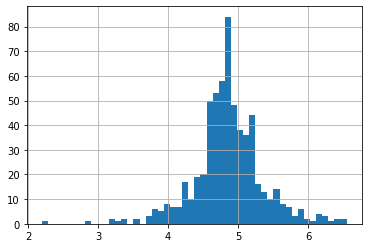

In [70]:
train['LoanAmount_log'] = np.log(train['LoanAmount'])
train['LoanAmount_log'].hist(bins=50)

<AxesSubplot:xlabel='LoanAmount_log', ylabel='Density'>

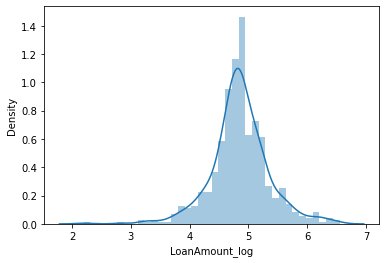

In [71]:
sns.distplot(train['LoanAmount_log'])

In [72]:
test['LoanAmount_log'] = np.log(test['LoanAmount'])

After taking the log transformation, the distribution looks much closer to normal distribution and the effect of extreme values has been significantly subsided.

# 4. Model Building

We will use accuracy as the evaluation metric.

## 4.1 First start with Logistic Regression which is used for predicting binary outcome.

In [73]:
# Drop the Loan_ID as it doesn't have any effect on the Loan_Status
train = train.drop('Loan_ID',axis = 1)
test = test.drop('Loan_ID', axis = 1)
X = train.drop('Loan_Status', axis = 1)
y = train.Loan_Status

In [74]:
# Convert Gender to 0(Gender_Male) and 1(Gender_Female)
X = pd.get_dummies(X)
train = pd.get_dummies(train)
test = pd.get_dummies(test)

In [75]:
from sklearn.model_selection import train_test_split
# Divide the dataset into training part and validation part
x_train, x_cv, y_train, y_cv = train_test_split(X,y,test_size=0.3)

# Input LogisticRegression and accuracy_score from sklearn and fit the logistic regression model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True, intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,penalty='l2', random_state=1, solver='liblinear', tol=0.0001,verbose=0, warm_start=False)


LogisticRegression(multi_class='ovr', n_jobs=1, random_state=1,
                   solver='liblinear')

In [76]:
# Predict the Loan_Status for validation set and calculate its accuracy
pred_cv = model.predict(x_cv)
accuracy_score(y_cv,pred_cv)

0.7945945945945946

In [77]:
# make predictions for the test dataset
pred_test = model.predict(test)

In [78]:
# Get the final prediction
submission=pd.read_csv("sample_submission_49d68Cx.csv")
submission['Loan_ID']=test_copy['Loan_ID']
def submit(predit_test, filename):
    submission['Loan_Status']=pred_test 
    submission['Loan_Status'].replace(0, 'N',inplace=True) 
    submission['Loan_Status'].replace(1, 'Y',inplace=True) 
    pd.DataFrame(submission, columns=['Loan_ID','Loan_Status']).to_csv(filename)
    
submit(pred_test,'logistic1.csv')
# 0.7778

# 5. Stratified k-flold Cross Validation
k-fold cross validation Steps:
- Randomly split your entire dataset into k”folds”
- For each k-fold in your dataset, build your model on k – 1 folds of the dataset. Then, test the model to check the effectiveness for kth fold
- Record the error you see on each of the predictions
- Repeat this until each of the k-folds has served as the test set
- The average of your k recorded errors is called the cross-validation error and will serve as your performance metric for the model

How to choose the right value of k?

Stratified k-fold Cross Validation:

A better approach when dealing with both variance and bias. But a randomly selected fold might not adequately represent the minor class, particularly in cases when there is a huge class imbalance.

Reference: https://www.analyticsvidhya.com/blog/2018/05/improve-model-performance-cross-validation-in-python-r/

In [79]:
# Now let’s make a cross validation logistic model with stratified 5 folds and make predictions for test dataset.
from sklearn.model_selection import StratifiedKFold 
i=1 
score_sum = []
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True) 
for train_index,test_index in kf.split(X,y):     
    print('\n{} of kfold {}'.format(i,kf.n_splits))     
    xtr,xvl = X.iloc[train_index],X.iloc[test_index]     
    ytr,yvl = y.iloc[train_index],y.iloc[test_index]         
    model = LogisticRegression(random_state=1)     
    model.fit(xtr, ytr)     
    pred_test = model.predict(xvl)     
    score = accuracy_score(yvl,pred_test)
    score_sum.append(score)
    print('accuracy_score',score)     
    i+=1 
pred_test = model.predict(test) 
pred=model.predict_proba(xvl)[:,1]
print("accuracy:",np.sum(score_sum)/5)


1 of kfold 5
accuracy_score 0.8048780487804879

2 of kfold 5
accuracy_score 0.8373983739837398

3 of kfold 5
accuracy_score 0.7804878048780488

4 of kfold 5
accuracy_score 0.7886178861788617

5 of kfold 5
accuracy_score 0.7950819672131147
accuracy: 0.8012928162068507


The mean validation accuracy for this model turns out to be 0.8013. Let us visualize the roc curve.

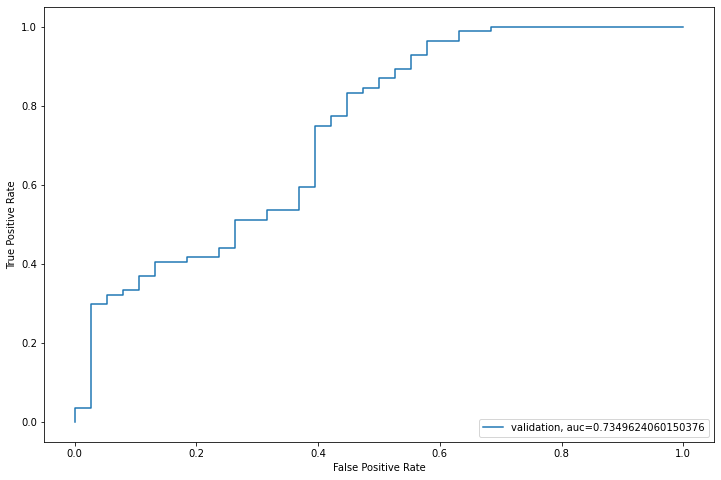

In [80]:
from sklearn import metrics 
fpr, tpr, _ = metrics.roc_curve(yvl,  pred) 
auc = metrics.roc_auc_score(yvl, pred) 
plt.figure(figsize=(12,8)) 
plt.plot(fpr,tpr,label="validation, auc="+str(auc)) 
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate') 
plt.legend(loc=4) 
plt.show()

We got an auc value of 0.735.

# 6.Feature Engineering
We will add three new features:
 - Total Income: As discussed during bivariate analysis we will combine the Applicant Income and Coapplicant Income. If the total income is high, chances of loan approval might also be high.
 - EMI: EMI is the monthly amount to be paid by the applicant to repay the loan. People who have high EMI’s might find it difficult to pay back the loan. We can calculate the EMI by taking the ratio of loan amount with respect to loan amount term.
 - Balance Income: This is the income left after the EMI has been paid. If this value is high, the chances are high that a person will repay the loan and hence increasing the chances of loan approval.

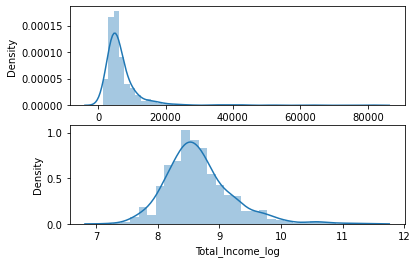

In [81]:
train['Total_Income']=train['ApplicantIncome']+train['CoapplicantIncome'] 
test['Total_Income']=test['ApplicantIncome']+test['CoapplicantIncome']
plt.figure(1)
plt.subplot(211)
sns.distplot(train['Total_Income']);

# Take the log transformation
train['Total_Income_log'] = np.log(train['Total_Income']) 
plt.subplot(212)
sns.distplot(train['Total_Income_log']); 
test['Total_Income_log'] = np.log(test['Total_Income'])

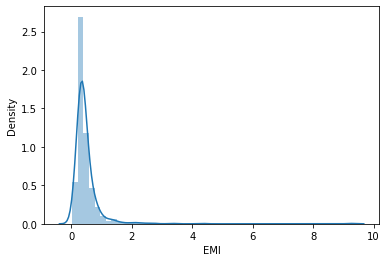

In [82]:
# EMI feature
train['EMI']=train['LoanAmount']/train['Loan_Amount_Term'] # days
test['EMI']=test['LoanAmount']/test['Loan_Amount_Term']
sns.distplot(train['EMI']);

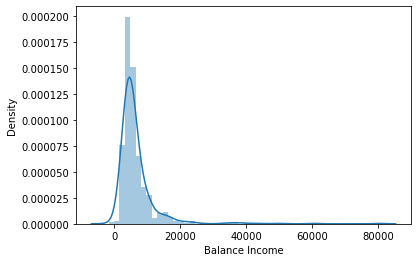

In [83]:
# Balance Income Feature
train['Balance Income']=train['Total_Income']-(train['EMI']*1000) # Multiply with 1000 to make the units equal 
test['Balance Income']=test['Total_Income']-(test['EMI']*1000)
sns.distplot(train['Balance Income']);

In [84]:
# Remove the noise
train=train.drop(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term'], axis=1) 
test=test.drop(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term'], axis=1)

In [86]:
train=train.drop(['Total_Income'], axis=1) 
test=test.drop(['Total_Income'], axis=1)
train.columns

Index(['Credit_History', 'Loan_Status', 'LoanAmount_log', 'Gender_Female',
       'Gender_Male', 'Married_No', 'Married_Yes', 'Dependents_3',
       'Dependents_0', 'Dependents_1', 'Dependents_2', 'Education_Graduate',
       'Education_Not Graduate', 'Self_Employed_No', 'Self_Employed_Yes',
       'Property_Area_Rural', 'Property_Area_Semiurban', 'Property_Area_Urban',
       'Total_Income_log', 'EMI', 'Balance Income'],
      dtype='object')

# 7. Compare the performance
We will use the logistic Regression model as baseline and build more complex models like RandomForest and XGBoost.

## 7.1 Logistic Regression

In [87]:
# Prepare the data
x = train.drop(['Loan_Status'],1)
y = train.Loan_Status 

In [123]:
i=1
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True) 
score_sum = []
for train_index,test_index in kf.split(x,y):
    print('\n{} of kfold {}'.format(i,kf.n_splits))     
    xtr,xvl = x.loc[train_index],x.loc[test_index]
    ytr,yvl = y[train_index],y[test_index]
    
    model = LogisticRegression(random_state=1)
    model.fit(xtr,ytr)
    pred_test = model.predict(xvl)
    score = accuracy_score(yvl,pred_test)
    score_sum.append(score)
    print('accuracy score',score)
    i+=1
pred_test = model.predict(test)
submit(pred_test,'LogisticRegression.csv')
pred = model.predict_proba(xvl)[:1]
pred_accuracy_total = {}
pred_accuracy_total['Logistic Regression']=np.sum(score_sum)/5
print("The mean validation accuracy for this model is ",np.sum(score_sum)/5)


1 of kfold 5
accuracy score 0.7967479674796748

2 of kfold 5
accuracy score 0.8373983739837398

3 of kfold 5
accuracy score 0.7804878048780488

4 of kfold 5
accuracy score 0.7804878048780488

5 of kfold 5
accuracy score 0.7868852459016393
The mean validation accuracy for this model is  0.7964014394242304


We can infer that the feature engineering has not improved the model.

## 7.2 Decision Tree 

In [124]:
from sklearn import tree
# Fit the decision tree model with 5 folders of cross validation
i=1
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True) 
score_sum = []
for train_index,test_index in kf.split(x,y):
    print('\n{} of kfold {}'.format(i,kf.n_splits))     
    xtr,xvl = x.loc[train_index],x.loc[test_index]
    ytr,yvl = y[train_index],y[test_index]
    
    model = tree.DecisionTreeClassifier(random_state=1)     
    model.fit(xtr,ytr)
    pred_test = model.predict(xvl)
    score = accuracy_score(yvl,pred_test)
    score_sum.append(score)
    print('accuracy score',score)
    i+=1
pred_test = model.predict(test)
submit(pred_test,'DecisionTree.csv')
pred_accuracy_total['Decision Tree']=np.sum(score_sum)/5
print("The mean validation accuracy for this model is ",np.sum(score_sum)/5)


1 of kfold 5
accuracy score 0.7235772357723578

2 of kfold 5
accuracy score 0.6910569105691057

3 of kfold 5
accuracy score 0.7723577235772358

4 of kfold 5
accuracy score 0.7317073170731707

5 of kfold 5
accuracy score 0.680327868852459
The mean validation accuracy for this model is  0.7198054111688659


The accuracy is less than the accuracy from logistic regression model. Let us try other methods.

## 7.3 Random Forest

In [107]:
from sklearn.ensemble import RandomForestClassifier
i=1
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True) 
score_sum = []
for train_index,test_index in kf.split(x,y):
    print('\n{} of kfold {}'.format(i,kf.n_splits))     
    xtr,xvl = x.loc[train_index],x.loc[test_index]
    ytr,yvl = y[train_index],y[test_index]
    
    model = RandomForestClassifier(random_state=1, max_depth=10)     # parameters
    model.fit(xtr,ytr)
    pred_test = model.predict(xvl)
    score = accuracy_score(yvl,pred_test)
    score_sum.append(score)
    print('accuracy score',score)
    i+=1
pred_test = model.predict(test)
print("The mean validation accuracy for this model is ",np.sum(score_sum)/5)


1 of kfold 5
accuracy score 0.8292682926829268

2 of kfold 5
accuracy score 0.8211382113821138

3 of kfold 5
accuracy score 0.7967479674796748

4 of kfold 5
accuracy score 0.8130081300813008

5 of kfold 5
accuracy score 0.7786885245901639
The mean validation accuracy for this model is  0.8077702252432359


We will try to improve the accuracy by tuning the hyperparameters for this model. We will use grid search to get the optimized values of hyper parameters. Grid-search is a way to select the best of a family of hyper parameters, parametrized by a grid of parameters.

In [90]:
from sklearn.model_selection import GridSearchCV
paramgrid = {'max_depth': list(range(1, 10, 1)), 'n_estimators': list(range(1, 200, 20))}
grid_search=GridSearchCV(RandomForestClassifier(random_state=1),paramgrid)

# from sklearn.model_selection import train_test_split 
x_train, x_cv, y_train, y_cv = train_test_split(x,y, test_size =0.3, random_state=1)

# fit the grid search model
grid_search.fit(x_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(random_state=1),
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'n_estimators': [1, 21, 41, 61, 81, 101, 121, 141, 161,
                                          181]})

In [108]:
GridSearchCV(cv=None, error_score='raise',estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',max_depth=None, max_features='auto', max_leaf_nodes=None,min_impurity_decrease=0.0, min_impurity_split=None,min_samples_leaf=1, min_samples_split=2,min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,oob_score=False, random_state=1, verbose=0, warm_start=False),  iid=True, n_jobs=1,param_grid={'max_depth': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19],'n_estimators': [1, 21, 41, 61, 81, 101, 121, 141, 161, 181]},pre_dispatch='2*n_jobs', refit=True, return_train_score='warn', scoring=None, verbose=0)

# Estimating the optimized value
grid_search.best_estimator_
# RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',max_depth=3, max_features='auto', max_leaf_nodes=None,min_impurity_decrease=0.0, min_impurity_split=None,min_samples_leaf=1, min_samples_split=2, min_weight_fraction_leaf=0.0, n_estimators=41, n_jobs=1, oob_score=False, random_state=1, verbose=0, warm_start=False)

RandomForestClassifier(max_depth=7, n_estimators=41, random_state=1)

So, the optimized value for the max_depth variable is 7 and for n_estimator is 41. Now let’s build the model using these optimized values.

In [125]:
i=1
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True) 
score_sum = []
for train_index,test_index in kf.split(x,y):
    print('\n{} of kfold {}'.format(i,kf.n_splits))     
    xtr,xvl = x.loc[train_index],x.loc[test_index]
    ytr,yvl = y[train_index],y[test_index]
    
    model = RandomForestClassifier(random_state=1, max_depth=7,n_estimators=41)     # parameters
    model.fit(xtr,ytr)
    pred_test = model.predict(xvl)
    score = accuracy_score(yvl,pred_test)
    score_sum.append(score)
    print('accuracy score',score)
    i+=1
pred_test = model.predict(test)
submit(pred_test,'RandomForest.csv')
pred_accuracy_total['Random Forest']=np.sum(score_sum)/5
print("The mean validation accuracy for this model is ",np.sum(score_sum)/5)


1 of kfold 5
accuracy score 0.8211382113821138

2 of kfold 5
accuracy score 0.8455284552845529

3 of kfold 5
accuracy score 0.7804878048780488

4 of kfold 5
accuracy score 0.7886178861788617

5 of kfold 5
accuracy score 0.7950819672131147
The mean validation accuracy for this model is  0.8061708649873385


<AxesSubplot:>

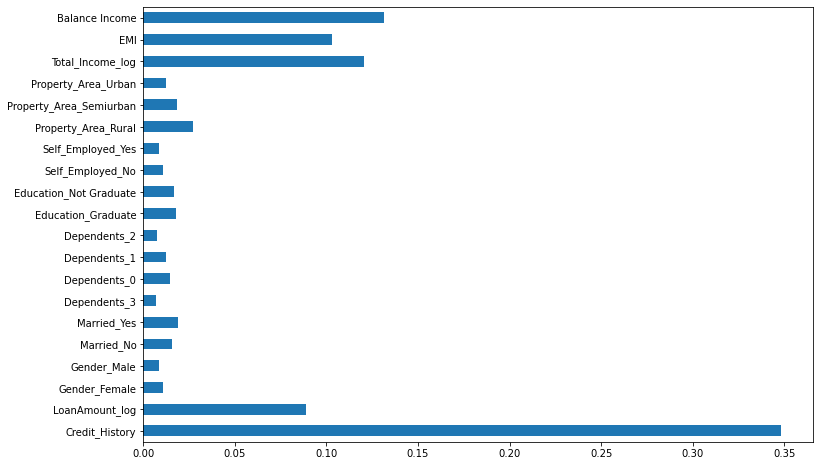

In [120]:
# Feature importance
importances=pd.Series(model.feature_importances_, index=x.columns)
importances.plot(kind='barh', figsize=(12,8))

We can see that Credit_History is the most important feature followed by Balance Income, Total Income, EMI. So, feature engineering helped us in predicting our target variable.

## 7.4 XGBOOST

In [61]:
# !pip3 install xgboost

In [126]:
from xgboost import XGBClassifier
i = 1
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True) 
score_sum = []
for train_index,test_index in kf.split(x,y):
    print('\n{} of kfold {}'.format(i,kf.n_splits))     
    xtr,xvl = x.loc[train_index],x.loc[test_index]
    ytr,yvl = y[train_index],y[test_index]
    
    model = XGBClassifier(n_estimators=50, max_depth=4)         # parameters
    model.fit(xtr,ytr)
    pred_test = model.predict(xvl)
    score = accuracy_score(yvl,pred_test)
    score_sum.append(score)
    print('accuracy score',score)
    i+=1
pred_test = model.predict(test)
submit(pred_test,'XGBOOST.csv')
pred_accuracy_total['XGBOOST']=np.sum(score_sum)/5
print("The mean validation accuracy for this model is ",np.sum(score_sum)/5)


1 of kfold 5
[17:52:21] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
accuracy score 0.7804878048780488

2 of kfold 5
[17:52:21] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
accuracy score 0.7886178861788617

3 of kfold 5
[17:52:21] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
accuracy score 0.7642276422764228

4 of kfol

The mean validation accuracy for this model is less than the random forest model.

## 7.5 SVM

In [127]:
from sklearn import svm
i=1
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True) 
score_sum = []
for train_index,test_index in kf.split(x,y):
    print('\n{} of kfold {}'.format(i,kf.n_splits))     
    xtr,xvl = x.loc[train_index],x.loc[test_index]
    ytr,yvl = y[train_index],y[test_index]
    
    model = svm.SVC(kernel='linear')  
    model.fit(xtr,ytr)
    pred_test = model.predict(xvl)
    score = accuracy_score(yvl,pred_test)
    score_sum.append(score)
    print('accuracy score',score)
    i+=1
pred_test = model.predict(test)
submit(pred_test,'SVM.csv')
pred_accuracy_total['SVM']=np.sum(score_sum)/5
print("The mean validation accuracy for this model is ",np.sum(score_sum)/5)


1 of kfold 5
accuracy score 0.8211382113821138

2 of kfold 5
accuracy score 0.8130081300813008

3 of kfold 5
accuracy score 0.7804878048780488

4 of kfold 5
accuracy score 0.7886178861788617

5 of kfold 5
accuracy score 0.7622950819672131
The mean validation accuracy for this model is  0.7931094228975077


# 8. Conclusion

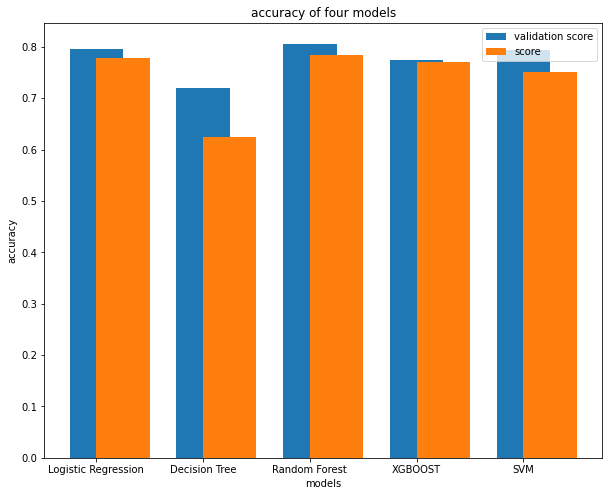

In [128]:
test_accuracy = [0.7778,0.625,0.7847,0.7708,0.75]
plt.figure(figsize=(10,8))
plt.bar(pred_accuracy_total.keys(),pred_accuracy_total.values(),width=0.5)
plt.bar(pred_accuracy_total.keys(),test_accuracy,align='edge',width=0.5)
plt.title('accuracy of four models')
plt.ylabel('accuracy')
plt.xlabel('models')
plt.legend(['validation score','score'],loc='upper right')

After trying and testing 5 different algorithms, the best accuracy is achieved by Random Forest (0.7847).

# Reference
https://datahack.analyticsvidhya.com/contest/practice-problem-loan-prediction-iii/

https://courses.analyticsvidhya.com/courses/take/loan-prediction-practice-problem-using-python/texts/6119325-introduction-to-the-course

Study Material:

https://scikit-learn.org/stable/tutorial/index.html
